In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set()
test =  pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
#train['WeekEnding_Date'] = pd.to_datetime(train['WeekEnding_Date'],dayfirst=True)
#test['WeekEnding_Date'] = pd.to_datetime(test['WeekEnding_Date'],dayfirst=True)

In [ ]:
train.info() #SK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         542 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       542 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          541 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      542 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       543 non-null    object 
 11  Siliguri_Average_Price    543 non-null    object 
 12  Siliguri_Ref_Price        543 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

In [ ]:
train.fillna(-10.0,inplace=True)

train #SKP

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11/05/19,152.57,165.65,134.76,146.06,149.81,134.17,122.98,115.81,98.29,81.65,109.36,94.33,89.81,70.66,118.993571
540,18/05/19,147.74,159.89,134.5,146.36,148.81,142.88,122.98,113,96.47,78.46,111.36,90.39,90.96,66.68,117.891429
541,25/05/19,149.69,155.28,134.29,142.67,147.25,149.11,122.78,111.2,94.61,77.33,109.2,92.87,87.72,66.49,117.177857
542,01/06/19,144.51,150.81,138.45,151.35,149.7,151.4,122.82,111.12,93.01,77.14,109.69,91.66,86.6,68,117.590000


In [ ]:
import math
#replaces missing value in a TS by calculating the avg of previous week and next week, if data is at the start then next weeks value is imputed
def value_replacer(arr, replace_another_val=None) -> list:
  if replace_another_val is None:
    index_to_fix = list(arr[arr==-10].index)
  else:
    index_to_fix = arr[arr==replace_another_val].index
  for i in index_to_fix:
    if i == 0:
      arr.iloc[i] = arr.iloc[i+1]

    elif i == len(arr)-1 :
      arr.iloc[i] = arr.iloc[i-1]

    else:
      try:
        arr.iloc[i] = (arr.iloc[i-1] + arr.iloc[i+1]) / 2
      except:
        print(arr.iloc[i])
  return arr

#we have three unwanted values NS, N.S. and 'No Sale' etc it would be unnecessary to write cases for each 
def trash_handler(x):
  try:
    x = np.float(x)
  except:
    x = -10.0
  return x

for i in train.columns[1:-1]:
  train[i] = train[i].apply(lambda x: trash_handler(x))

In [ ]:
from tqdm import  tqdm
train[train.columns[1:]] = train[train.columns[1:]].astype('float')
for i in tqdm(train.columns[1:]):
  train[i] = value_replacer(pd.Series(train[i]))

#Average price cant be null assumed to be data collection error
from tqdm import  tqdm
for i in tqdm(train.columns[1:]):
  train[i] = value_replacer(train[i], 0)


  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

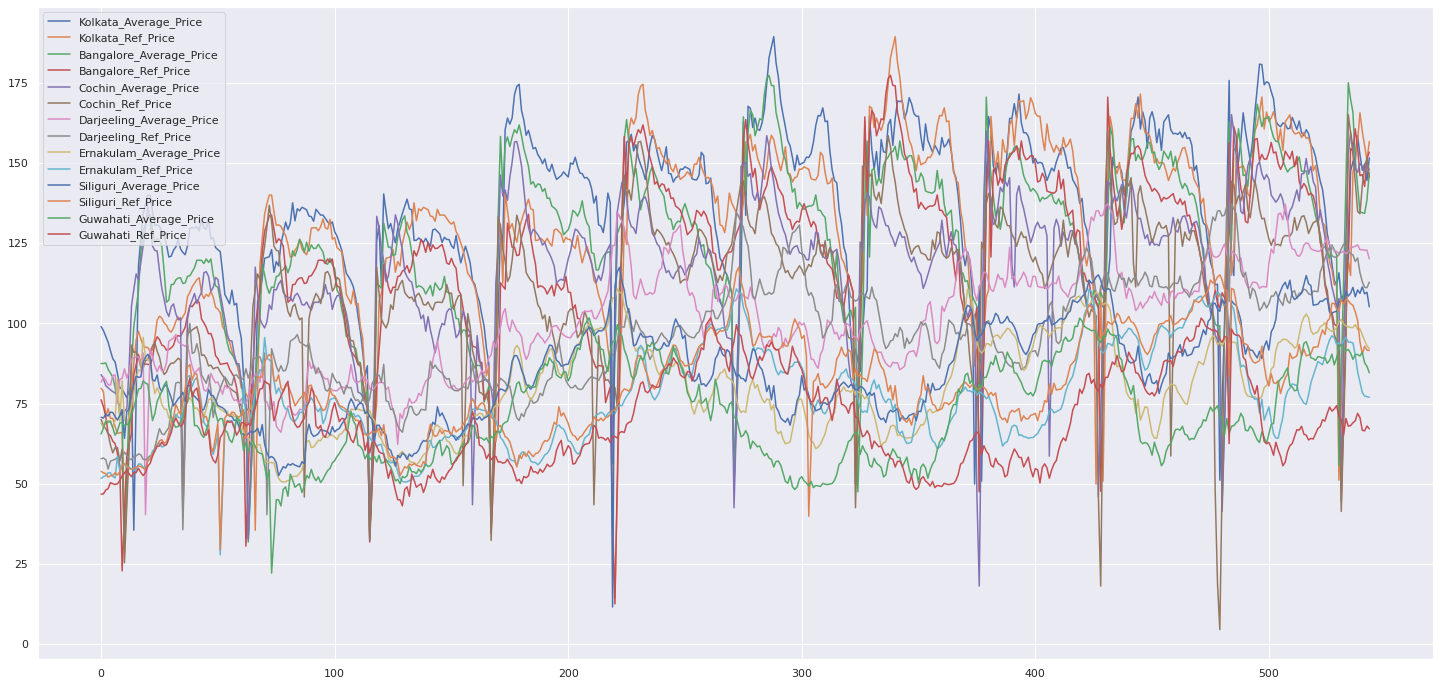

In [ ]:

train[train.columns[1:-1]].plot(kind ='line',figsize=(25,12))

In [ ]:
location_train = list(set([i.split('_')[0] for i in list(train.columns[1:-1])]))
location_test = list(set([i.split('_')[0] for i in list(test.columns[1:-1])]))
loc_avg = [i for i in train.columns if 'Average' in i]
loc_ref = [i for i in train.columns if 'Ref' in i]

In [ ]:
#check location mismatch
print("Location mismatch: ", not location_train == location_test)

Location mismatch:  False


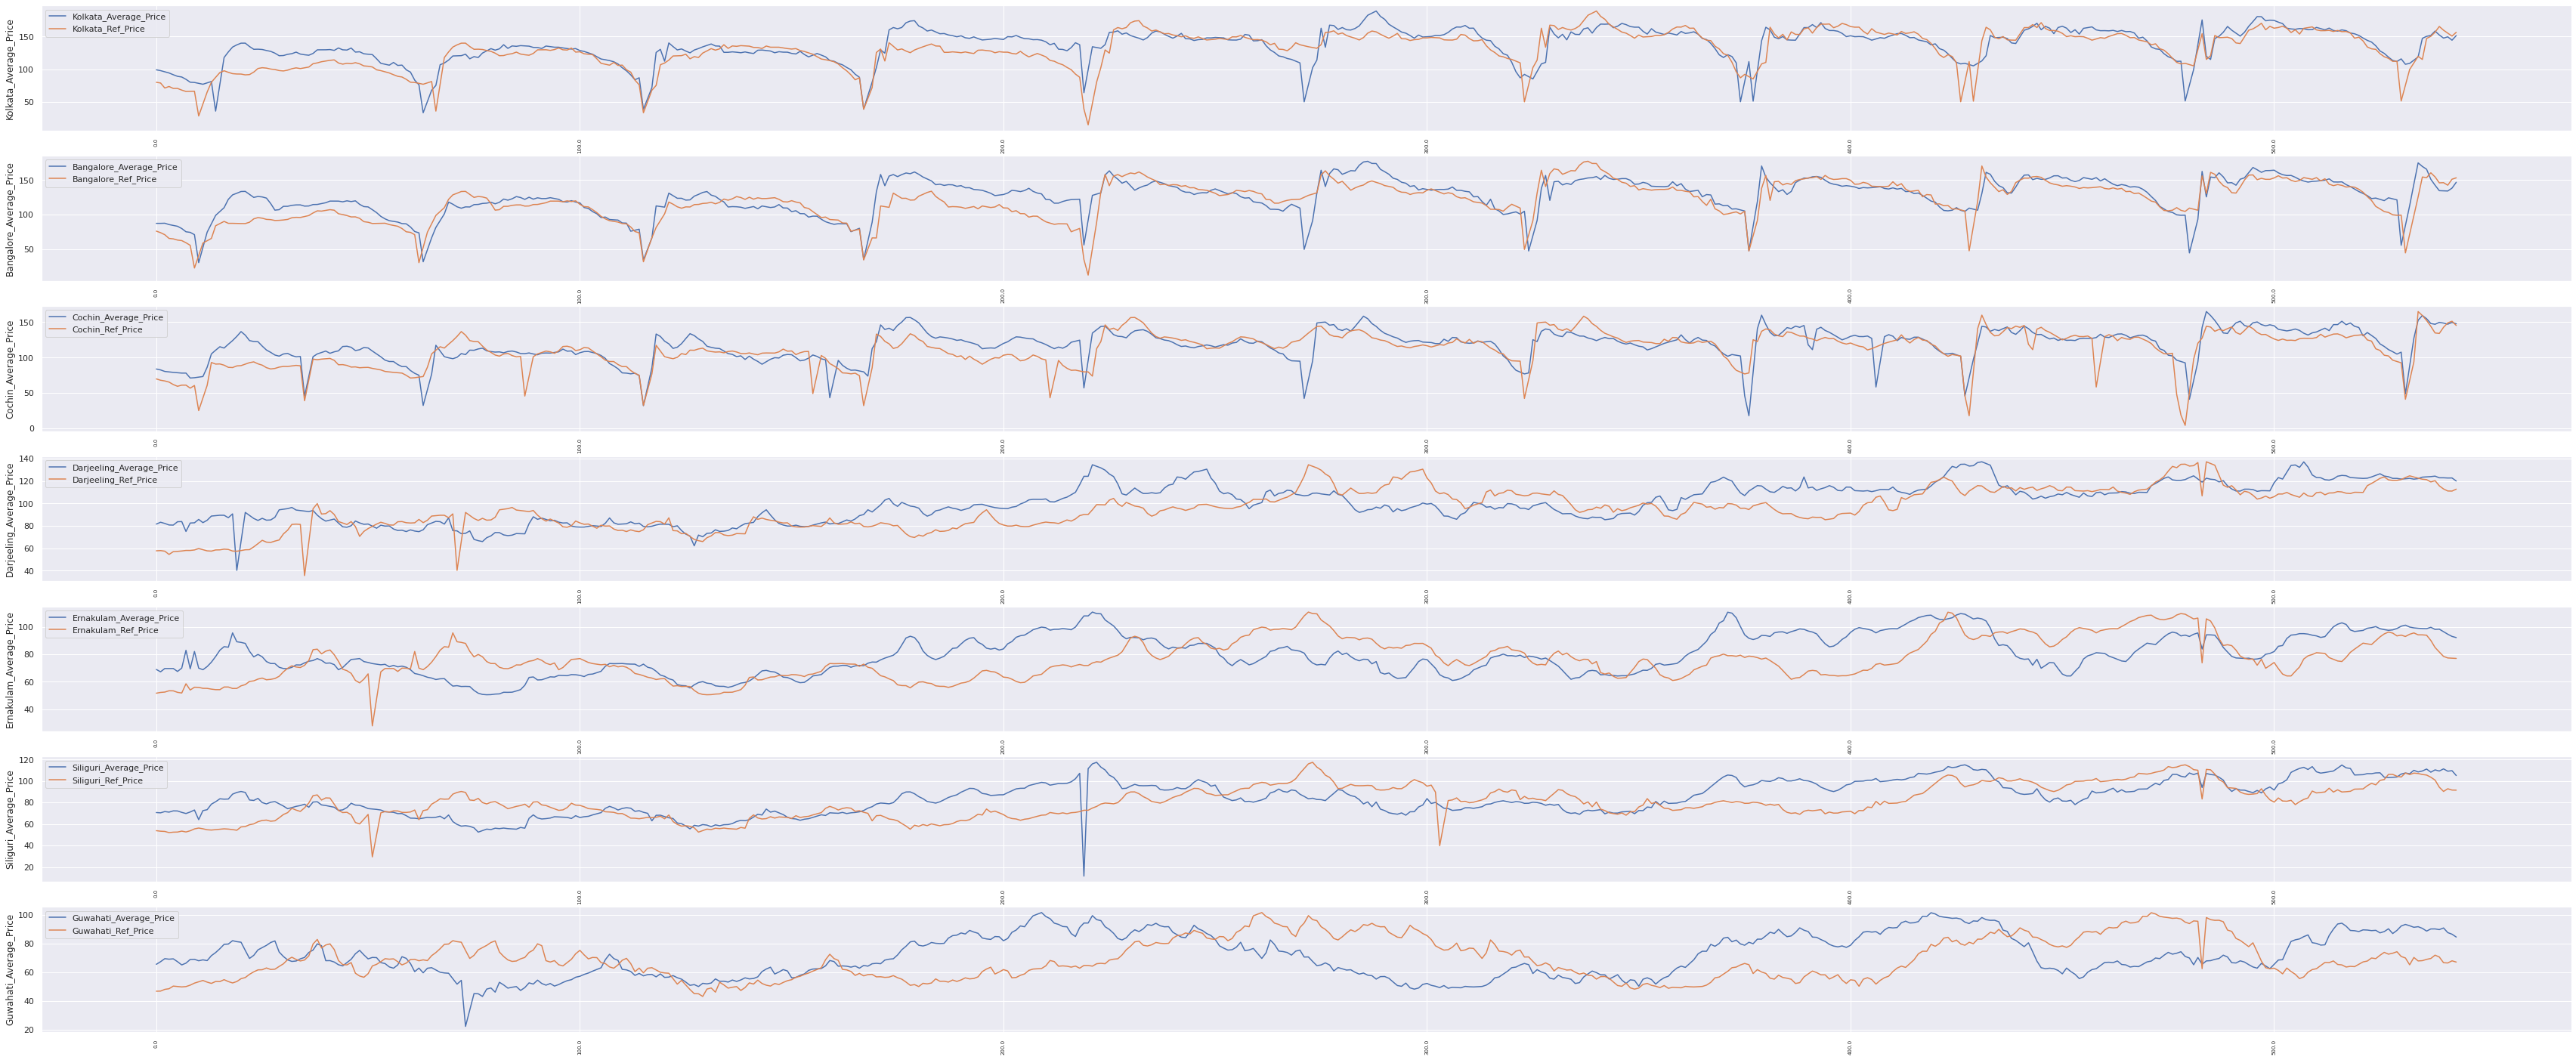

In [ ]:
#Create a generator object for column names
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def get_col(loc_avg, loc_ref):
  for i in zip(loc_avg,loc_ref):
    yield i


A = get_col(loc_avg, loc_ref)
fig, ax = plt.subplots(7,1, figsize= (60,25))
for i in ax:
  avg,ref = next(A)
  sns.lineplot(np.arange(len(train['WeekEnding_Date'])), train[avg], label =avg , ax =i)
  sns.lineplot(np.arange(len(train['WeekEnding_Date'])), train[ref], label =ref , ax =i)
  i.set_xticklabels(i.get_xticks(),rotation = 90,fontsize=7)  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    float64
 2   Kolkata_Ref_Price         544 non-null    float64
 3   Bangalore_Average_Price   544 non-null    float64
 4   Bangalore_Ref_Price       544 non-null    float64
 5   Cochin_Average_Price      544 non-null    float64
 6   Cochin_Ref_Price          544 non-null    float64
 7   Darjeeling_Average_Price  544 non-null    float64
 8   Darjeeling_Ref_Price      544 non-null    float64
 9   Ernakulam_Average_Price   544 non-null    float64
 10  Ernakulam_Ref_Price       544 non-null    float64
 11  Siliguri_Average_Price    544 non-null    float64
 12  Siliguri_Ref_Price        544 non-null    float64
 13  Guwahati_Average_Price    544 non-null    float64
 14  Guwahati_R

In [ ]:
#create ARIMA model since we see seasonality
#
from statsmodels.tsa.stattools import adfuller as adf
l =[]
p =[]
a=[]
lag =[]
nobs = []
for i in train[train.columns[1:-1]]:
  l.append(i)
  a.append(adf(train[i].values)[0])
  p.append(adf(train[i].values)[1])
  lag.append(adf(train[i].values)[2])
  nobs.append(adf(train[i].values)[3])
res = np.concatenate([np.array(l).reshape(-1,1),np.array(a).reshape(-1,1),np.array(p).reshape(-1,1),np.array(lag).reshape(-1,1),np.array(nobs).reshape(-1,1)], axis =1)
res = pd.DataFrame(res)
res.columns = ['Column','Adfuller' ,'p-value','lags','nobs']
res['p-value'] = res['p-value'].astype('float')
res['infered'] = res['p-value'].apply(lambda x : 'Stationary' if x<0.05 else 'NOT Stationary')
names = res['Column']
res

,Column,Adfuller,p-value,lags,nobs,infered
0,Kolkata_Average_Price,-5.250735118607421,6.920302e-06,6,537,Stationary
1,Kolkata_Ref_Price,-4.689881647101876,8.791402e-05,6,537,Stationary
2,Bangalore_Average_Price,-4.935787819482933,2.969166e-05,8,535,Stationary
3,Bangalore_Ref_Price,-4.654652464529532,1.023044e-04,5,538,Stationary
4,Cochin_Average_Price,-5.947786058615754,2.183304e-07,3,540,Stationary
5,Cochin_Ref_Price,-5.480483420473509,2.290263e-06,3,540,Stationary
6,Darjeeling_Average_Price,-2.345590352551941,1.576853e-01,2,541,NOT Stationary
7,Darjeeling_Ref_Price,-2.743604282798794,6.679195e-02,3,540,NOT Stationary
8,Ernakulam_Average_Price,-2.7962077770482936,5.881751e-02,4,539,NOT Stationary
9,Ernakulam_Ref_Price,-3.2266468671829376,1.849315e-02,0,543,Stationary


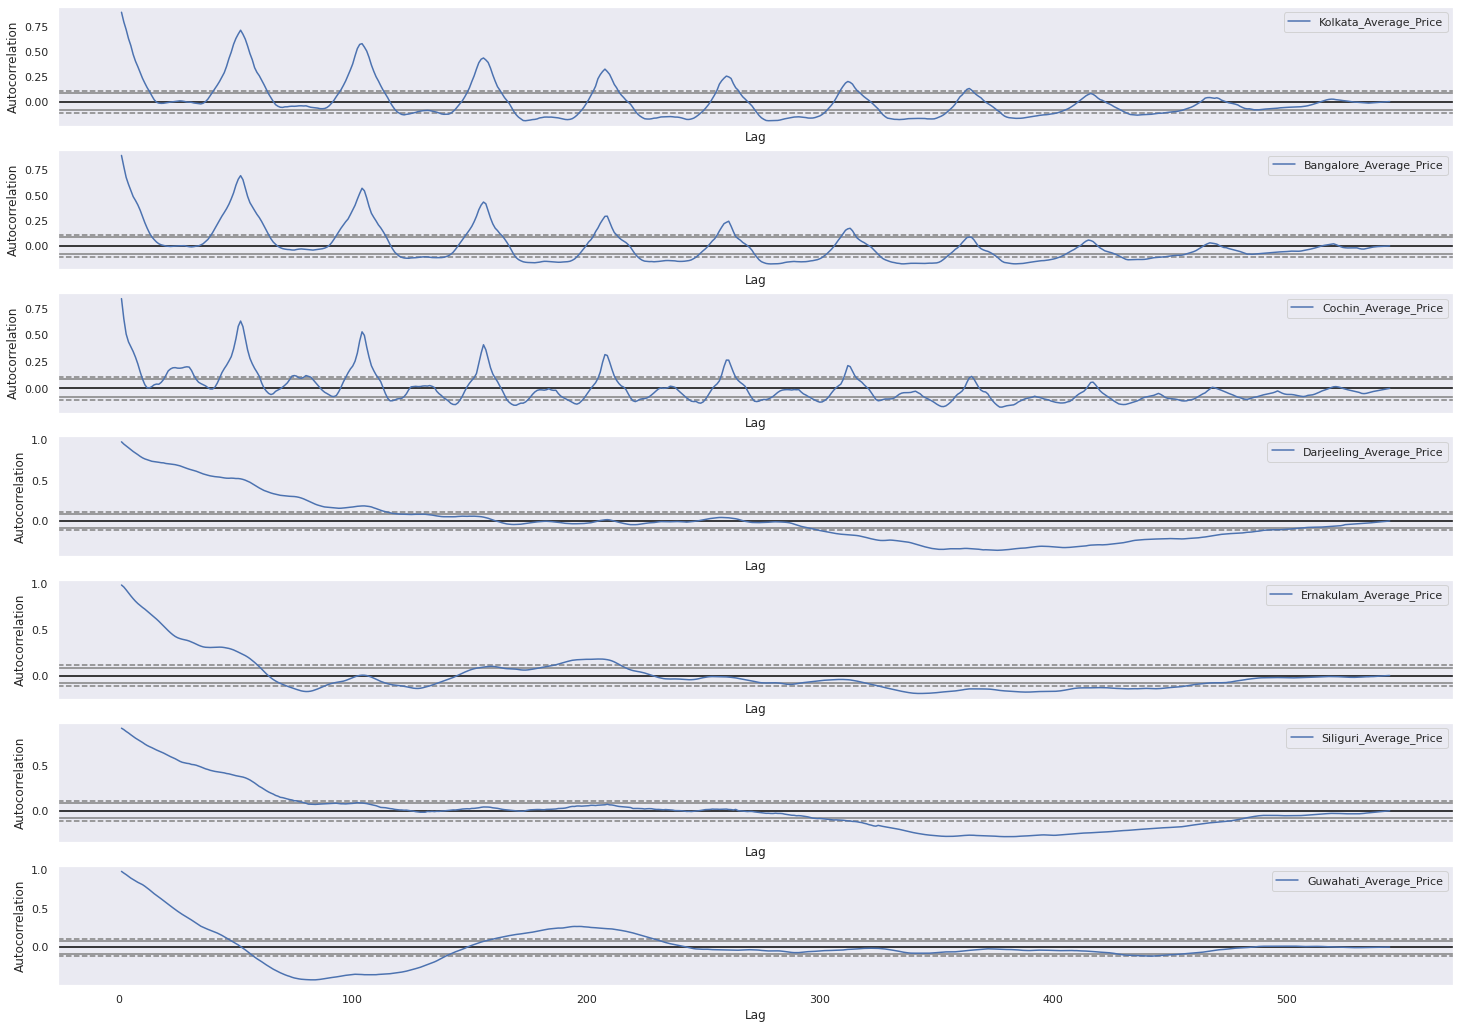

In [ ]:
from pandas.plotting import autocorrelation_plot as acp

A = get_col(loc_avg, loc_ref)
fig, ax = plt.subplots(7,1,sharex=True, figsize= (25,18))
for i in ax:
  avg,ref = next(A)
  acp(train[avg], label =avg , ax =i)  

In [ ]:
#For Seasonal (NOT STATIONARY) data
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(train['Bangalore_Average_Price'],trace=True, suppress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4243.794, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4245.662, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4245.655, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4241.840, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4247.643, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.708 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2119.920
Date:                Thu, 19 Aug 2021   AIC                           4241.840
Time:                        17:07:07   BIC                           4246.137
Sample:                             0   HQIC                          4243.520
                                - 544                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       144.0732      3.361     42.869      0.000     137.486     150.660
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              3034.36
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


**RR**

In [ ]:
names = pd.DataFrame(names)
names

,Column
0,Kolkata_Average_Price
1,Kolkata_Ref_Price
2,Bangalore_Average_Price
3,Bangalore_Ref_Price
4,Cochin_Average_Price
5,Cochin_Ref_Price
6,Darjeeling_Average_Price
7,Darjeeling_Ref_Price
8,Ernakulam_Average_Price
9,Ernakulam_Ref_Price


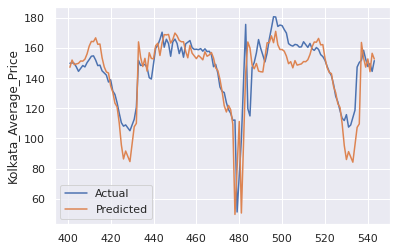

In [ ]:
tdf = train['Kolkata_Average_Price'][:401]
model_Kolkata_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,104))
model_Kolkata_Average_Price=model_Kolkata_Average_Price.fit()
A = model_Kolkata_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Kolkata_Average_Price'][401:544])), train['Kolkata_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),A, label = 'Predicted')
A = pd.DataFrame(np.array(A).reshape(-1,1))
A.columns = ['Kolkata_Average_Price']

In [ ]:
A

,Kolkata_Average_Price
0,147.240
1,152.050
2,149.060
3,149.465
4,149.870
...,...
138,147.350
139,152.790
140,144.310
141,156.530


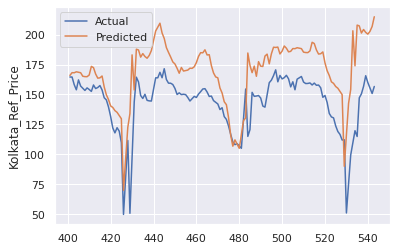

In [ ]:
tdf = train['Kolkata_Ref_Price'][:401]
model_Kolkata_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,103))
model_Kolkata_Ref_Price=model_Kolkata_Ref_Price.fit()
Ab = model_Kolkata_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Kolkata_Ref_Price'][401:544])), train['Kolkata_Ref_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Kolkata_Ref_Price'] = np.array(Ab).reshape(-1,1)


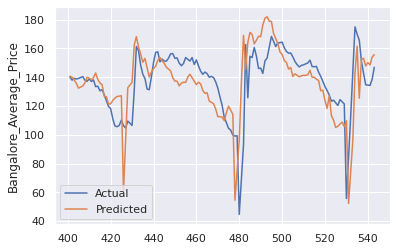

In [ ]:
tdf = train['Bangalore_Average_Price'][:401]
model_Bangalore_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,207))
model_Bangalore_Average_Price=model_Bangalore_Average_Price.fit()
Ab = model_Bangalore_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Bangalore_Average_Price'][401:544])), train['Bangalore_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Bangalore_Average_Price'] = np.array(Ab).reshape(-1,1)


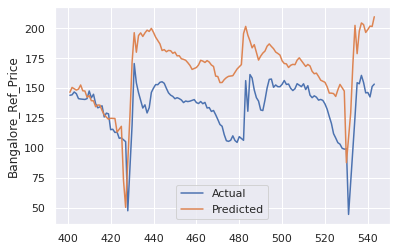

In [ ]:
tdf = train['Bangalore_Ref_Price'][:401]
model_Bangalore_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,207))
model_Bangalore_Ref_Price=model_Bangalore_Ref_Price.fit()
Ab = model_Bangalore_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Bangalore_Ref_Price'][401:544])), train['Bangalore_Ref_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Bangalore_Ref_Price'] = np.array(Ab).reshape(-1,1)




In [ ]:
A.to_csv('OP.csv')

In [ ]:
A = pd.read_csv('OP.csv', index_col=0)
A

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,week_no,Ernakulam_Ref_Price
0,147.240,165.880,140.76,146.560,124.77,121.56,121.07,90.28,96.22,95.66,71.12,79.16,58.46,36,64.69
1,152.050,168.210,140.01,150.610,125.55,122.87,120.62,89.61,97.47,94.07,72.09,80.94,57.74,37,64.66
2,149.060,168.120,137.99,149.495,125.94,121.74,119.08,88.31,97.41,94.69,72.25,84.36,54.48,38,63.93
3,149.465,168.920,135.73,148.380,125.55,119.96,122.54,89.40,97.48,96.54,73.19,78.44,54.70,39,64.67
4,149.870,168.535,132.39,149.190,128.91,121.61,125.58,90.49,95.83,93.06,75.08,78.99,54.48,40,65.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,147.350,201.820,147.81,196.480,148.49,150.65,113.04,94.55,105.77,111.11,98.44,87.80,38.45,19,88.87
139,152.790,200.360,150.15,198.930,147.81,147.18,110.24,95.28,105.89,109.31,96.19,86.25,39.22,20,84.34
140,144.310,202.710,148.48,201.760,145.19,153.70,107.84,92.15,104.78,106.51,96.75,84.95,41.75,21,81.61
141,156.530,206.780,154.01,201.450,142.70,161.02,107.35,89.20,106.03,104.91,95.57,82.88,42.45,22,80.26


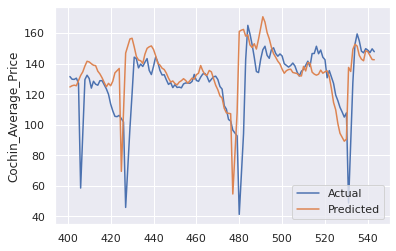

In [ ]:
tdf = train['Cochin_Average_Price'][:401]
model_Cochin_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,206))
model_Cochin_Average_Price=model_Cochin_Average_Price.fit()
Ab = model_Cochin_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Cochin_Average_Price'][401:544])), train['Cochin_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Cochin_Average_Price'] = np.array(Ab).reshape(-1,1)


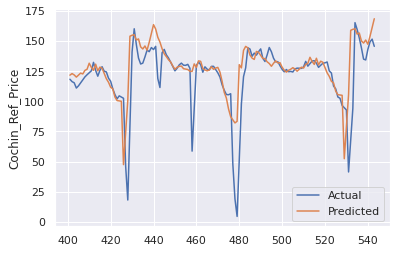

In [ ]:
tdf = train['Cochin_Ref_Price'][:401]
model_Cochin_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,103))
model_Cochin_Ref_Price=model_Cochin_Ref_Price.fit()
Ab = model_Cochin_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Cochin_Ref_Price'][401:544])), train['Cochin_Ref_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Cochin_Ref_Price'] = np.array(Ab).reshape(-1,1)


In [ ]:
A.to_csv('OP.csv')

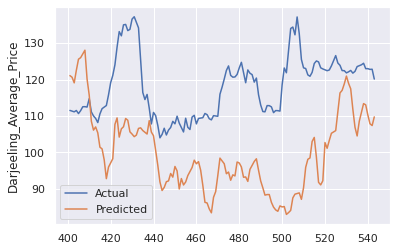

In [ ]:
tdf = train['Darjeeling_Average_Price'][:401]
model_Darjeeling_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,160))
model_Darjeeling_Average_Price=model_Darjeeling_Average_Price.fit()
Ab = model_Darjeeling_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Darjeeling_Average_Price'][401:544])), train['Darjeeling_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Darjeeling_Average_Price'] =np.array(Ab).reshape(-1,1)


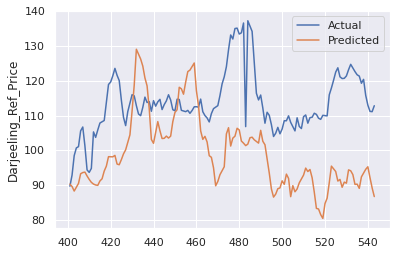

In [ ]:
tdf = train['Darjeeling_Ref_Price'][:401]
model_Darjeeling_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,160))
model_Darjeeling_Ref_Price=model_Darjeeling_Ref_Price.fit()
Ab = model_Darjeeling_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Darjeeling_Ref_Price'][401:544])), train['Darjeeling_Ref_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Darjeeling_Ref_Price'] =np.array(Ab).reshape(-1,1)



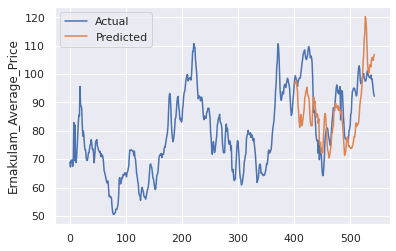

In [ ]:
tdf = train['Ernakulam_Average_Price'][:401]
model_Ernakulam_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,156))
model_Ernakulam_Average_Price=model_Ernakulam_Average_Price.fit()
Ab = model_Ernakulam_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(len(train['Ernakulam_Average_Price'])), train['Ernakulam_Average_Price'], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Ernakulam_Average_Price'] = np.array(Ab).reshape(-1,1)

#(0, 1, 0),seasonal_order=(0,1,0,104), ,seasonal_order=(0,1,0,103) ,seasonal_order=(0,1,0,207))
#seasonal_order=(0,1,0,207)) seasonal_order=(0,1,0,206)) seasonal_order=(0,1,0,104)) seasonal_order=(0,1,0,160))
#seasonal_order=(0,1,0,160)) seasonal_order=(0,1,0,156))

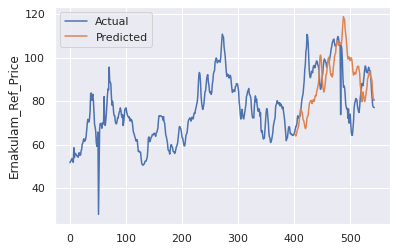

In [ ]:
tdf = train['Ernakulam_Ref_Price'][:401]
model_Ernakulam_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,216))
model_Ernakulam_Ref_Price=model_Ernakulam_Ref_Price.fit()
Ab = model_Ernakulam_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(len(train['Ernakulam_Ref_Price'])), train['Ernakulam_Ref_Price'], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Ernakulam_Ref_Price'] = np.array(Ab).reshape(-1,1)

In [ ]:
A.to_csv('OP.csv')
A = pd.read_csv('OP.csv', index_col=0)
A

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,week_no,Ernakulam_Ref_Price
0,147.240,165.880,140.76,146.560,124.77,121.56,121.07,90.28,96.22,95.66,71.12,79.16,58.46,36,64.69
1,152.050,168.210,140.01,150.610,125.55,122.87,120.62,89.61,97.47,94.07,72.09,80.94,57.74,37,64.66
2,149.060,168.120,137.99,149.495,125.94,121.74,119.08,88.31,97.41,94.69,72.25,84.36,54.48,38,63.93
3,149.465,168.920,135.73,148.380,125.55,119.96,122.54,89.40,97.48,96.54,73.19,78.44,54.70,39,64.67
4,149.870,168.535,132.39,149.190,128.91,121.61,125.58,90.49,95.83,93.06,75.08,78.99,54.48,40,65.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,147.350,201.820,147.81,196.480,148.49,150.65,113.04,94.55,105.77,111.11,98.44,87.80,38.45,19,88.87
139,152.790,200.360,150.15,198.930,147.81,147.18,110.24,95.28,105.89,109.31,96.19,86.25,39.22,20,84.34
140,144.310,202.710,148.48,201.760,145.19,153.70,107.84,92.15,104.78,106.51,96.75,84.95,41.75,21,81.61
141,156.530,206.780,154.01,201.450,142.70,161.02,107.35,89.20,106.03,104.91,95.57,82.88,42.45,22,80.26


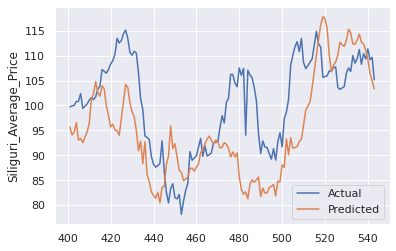

In [ ]:
tdf = train['Siliguri_Average_Price'][:401]
model_Siliguri_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,148))
model_Siliguri_Average_Price=model_Siliguri_Average_Price.fit()
Ab = model_Siliguri_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Siliguri_Average_Price'][401:544])), train['Siliguri_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Siliguri_Average_Price'] = np.array(Ab).reshape(-1,1)


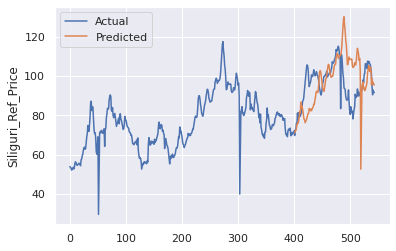

In [ ]:
tdf = train['Siliguri_Ref_Price'][:401]
model_Siliguri_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,216))
model_Siliguri_Ref_Price=model_Siliguri_Ref_Price.fit()
Ab = model_Siliguri_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(len(train['Siliguri_Ref_Price'])), train['Siliguri_Ref_Price'], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Siliguri_Ref_Price'] = np.array(Ab).reshape(-1,1)


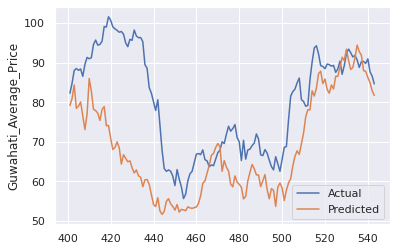

In [ ]:
tdf = train['Guwahati_Average_Price'][:401]
model_Guwahati_Average_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,147))
model_Guwahati_Average_Price=model_Guwahati_Average_Price.fit()
Ab = model_Guwahati_Average_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Guwahati_Average_Price'][401:544])), train['Guwahati_Average_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Guwahati_Average_Price'] = np.array(Ab).reshape(-1,1)




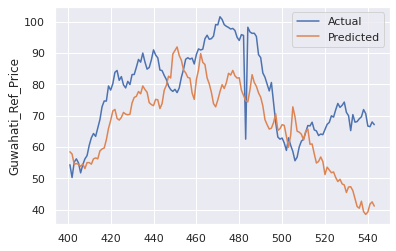

In [ ]:
tdf = train['Guwahati_Ref_Price'][:401]
model_Guwahati_Ref_Price=sm.tsa.statespace.SARIMAX(tdf,order=(0, 1, 0),seasonal_order=(0,1,0,190))
model_Guwahati_Ref_Price=model_Guwahati_Ref_Price.fit()
Ab = model_Guwahati_Ref_Price.predict(start=401, end=543, dynamic=True)
sns.lineplot(np.arange(401, 401+len(train['Guwahati_Ref_Price'][401:544])), train['Guwahati_Ref_Price'][401:544], label = 'Actual')
sns.lineplot(np.arange(401,544),Ab, label = 'Predicted')
A['Guwahati_Ref_Price'] = np.array(Ab).reshape(-1,1)



In [ ]:
A.to_csv('OP.csv')

In [ ]:
seasonal_order=[(0,1,0,104),(0,1,0,103),(0,1,0,207),(0,1,0,207),(0,1,0,206),(0,1,0,104),(0,1,0,160),(0,1,0,160),(0,1,0,156),(0,1,0,216),(0,1,0,148),
(0,1,0,216),(0,1,0,147),(0,1,0,190)]
names

,Column
0,Kolkata_Average_Price
1,Kolkata_Ref_Price
2,Bangalore_Average_Price
3,Bangalore_Ref_Price
4,Cochin_Average_Price
5,Cochin_Ref_Price
6,Darjeeling_Average_Price
7,Darjeeling_Ref_Price
8,Ernakulam_Average_Price
9,Ernakulam_Ref_Price


In [ ]:
forecasted_test = pd.DataFrame(np.arange(test.shape[0]).reshape(-1,1))
forecasted_test

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
for i in tqdm(range(len(names['Column']))):
  tc = names['Column'][i]
  so = seasonal_order[i]
  model=sm.tsa.statespace.SARIMAX(train[tc],order=(0, 1, 0),seasonal_order=so)
  model=model.fit()
  Ab = model.predict(start=544, end=543 + test.shape[0], dynamic=True)
  forecasted_test[tc] =np.array(Ab).reshape(-1,1)


100%|██████████| 14/14 [03:59<00:00, 17.09s/it]


In [ ]:
forecasted_test.shape

(29, 15)

In [ ]:
test.shape

(29, 16)

# **RR2**

In [ ]:
A = pd.read_csv('OP.csv', index_col=0)
c = pd.to_datetime(train['WeekEnding_Date'][401:544], dayfirst= True)
A['week_no'] = c.dt.weekofyear.values
A

,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,week_no,Ernakulam_Ref_Price
0,147.240,165.880,140.76,146.560,124.77,121.56,121.07,90.28,96.22,95.66,71.12,79.16,58.46,36,64.69
1,152.050,168.210,140.01,150.610,125.55,122.87,120.62,89.61,97.47,94.07,72.09,80.94,57.74,37,64.66
2,149.060,168.120,137.99,149.495,125.94,121.74,119.08,88.31,97.41,94.69,72.25,84.36,54.48,38,63.93
3,149.465,168.920,135.73,148.380,125.55,119.96,122.54,89.40,97.48,96.54,73.19,78.44,54.70,39,64.67
4,149.870,168.535,132.39,149.190,128.91,121.61,125.58,90.49,95.83,93.06,75.08,78.99,54.48,40,65.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,147.350,201.820,147.81,196.480,148.49,150.65,113.04,94.55,105.77,111.11,98.44,87.80,38.45,19,88.87
139,152.790,200.360,150.15,198.930,147.81,147.18,110.24,95.28,105.89,109.31,96.19,86.25,39.22,20,84.34
140,144.310,202.710,148.48,201.760,145.19,153.70,107.84,92.15,104.78,106.51,96.75,84.95,41.75,21,81.61
141,156.530,206.780,154.01,201.450,142.70,161.02,107.35,89.20,106.03,104.91,95.57,82.88,42.45,22,80.26


In [ ]:
model_collection = []
col_name =[]
rmsle_xgb = []
rmsle_arima = []
names

,Column
0,Kolkata_Average_Price
1,Kolkata_Ref_Price
2,Bangalore_Average_Price
3,Bangalore_Ref_Price
4,Cochin_Average_Price
5,Cochin_Ref_Price
6,Darjeeling_Average_Price
7,Darjeeling_Ref_Price
8,Ernakulam_Average_Price
9,Ernakulam_Ref_Price


In [ ]:
from sklearn.metrics import mean_squared_log_error as rmsle
def ret_rmsle(yp,y):
  return rmsle(yp,y)


In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV



xgb1 = XGBRegressor(random_state=1)
parameters = {'nthread':[4], 
              'learning_rate': [ 0.05, 0.1, 0.3], 
              'max_depth': [2,5,10,20],
              'min_child_weight': [3,2,1],
              'silent': [1],
              'subsample': [0.7, 0.6],
              'colsample_bytree': [1],
              'n_estimators': [10,50,100,500,600],
              'objective':['reg:squarederror']
              
              }

xgb_grid0 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid0.fit(A[['Bangalore_Average_Price']][:101].values.reshape(-1,1),train['Bangalore_Average_Price'][401:502].values.reshape(-1,1))

print(xgb_grid0.best_score_)
print(xgb_grid0.best_params_)
pr = xgb_grid0.predict(A[['Bangalore_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr = pd.DataFrame(pr)
Xgb_pr.columns = ['Bangalore_Average_Price']
model_collection.append(xgb_grid0)
col_name.append('Bangalore_Average_Price')
rmsle_xgb.append(rmsle( train['Bangalore_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Bangalore_Average_Price'][502:533].values.reshape(-1,1),A[['Bangalore_Average_Price']][101:132].values))

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:  3.3min


-2.1859503000312697
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


In [ ]:
xgb_grid1 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid1.fit(A[['Bangalore_Ref_Price']][:101].values.reshape(-1,1),train['Bangalore_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid1.best_score_)
print(xgb_grid1.best_params_)
pr = xgb_grid1.predict(A[['Bangalore_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Bangalore_Ref_Price'] = pr

model_collection.append(xgb_grid1)
col_name.append('Bangalore_Ref_Price')
rmsle_xgb.append(rmsle( train['Bangalore_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Bangalore_Ref_Price'][502:533].values.reshape(-1,1),A[['Bangalore_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1046 tasks      | elapsed:  3.3min


-0.48507620224474923
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


In [ ]:
xgb_grid2 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid2.fit(A[['Kolkata_Average_Price']][:101].values.reshape(-1,1),train['Kolkata_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid2.best_score_)
print(xgb_grid2.best_params_)
pr = xgb_grid2.predict(A[['Kolkata_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Kolkata_Average_Price'] = pr

model_collection.append(xgb_grid2)
col_name.append('Kolkata_Average_Price')
rmsle_xgb.append(rmsle( train['Kolkata_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Kolkata_Average_Price'][502:533].values.reshape(-1,1),A[['Kolkata_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  2.0min


0.39019375982734966
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished


In [ ]:
xgb_grid3 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid3.fit(A[['Kolkata_Ref_Price']][:101].values.reshape(-1,1),train['Kolkata_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid3.best_score_)
print(xgb_grid3.best_params_)
pr = xgb_grid3.predict(A[['Kolkata_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Kolkata_Ref_Price'] = pr

model_collection.append(xgb_grid3)
col_name.append('Kolkata_Ref_Price')
rmsle_xgb.append(rmsle( train['Kolkata_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Kolkata_Ref_Price'][502:533].values.reshape(-1,1),A[['Kolkata_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:  2.1min


0.06422934320171085
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished


In [ ]:
xgb_grid4 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid4.fit(A[['Cochin_Average_Price']][:101].values.reshape(-1,1),train['Cochin_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid4.best_score_)
print(xgb_grid4.best_params_)
pr = xgb_grid4.predict(A[['Cochin_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Cochin_Average_Price'] = pr

model_collection.append(xgb_grid4)
col_name.append('Cochin_Average_Price')
rmsle_xgb.append(rmsle( train['Cochin_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Cochin_Average_Price'][502:533].values.reshape(-1,1),A[['Cochin_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:  2.1min


-1.1097579373592115
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished


In [ ]:
xgb_grid5 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid5.fit(A[['Cochin_Ref_Price']][:101].values.reshape(-1,1),train['Cochin_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid5.best_score_)
print(xgb_grid5.best_params_)
pr = xgb_grid5.predict(A[['Cochin_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Cochin_Ref_Price'] = pr

model_collection.append(xgb_grid5)
col_name.append('Cochin_Ref_Price')
rmsle_xgb.append(rmsle( train['Cochin_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Cochin_Ref_Price'][502:533].values.reshape(-1,1),A[['Cochin_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1052 tasks      | elapsed:  3.4min


0.2831994113225443
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


In [ ]:
xgb_grid6 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid6.fit(A[['Darjeeling_Average_Price']][:101].values.reshape(-1,1),train['Darjeeling_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid6.best_score_)
print(xgb_grid6.best_params_)
pr = xgb_grid6.predict(A[['Darjeeling_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Darjeeling_Average_Price'] = pr

model_collection.append(xgb_grid6)
col_name.append('Darjeeling_Average_Price')
rmsle_xgb.append(rmsle( train['Darjeeling_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Darjeeling_Average_Price'][502:533].values.reshape(-1,1),A[['Darjeeling_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:  3.2min


-3.353527514967032
{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 10, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


In [ ]:
xgb_grid7 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid7.fit(A[['Darjeeling_Ref_Price']][:101].values.reshape(-1,1),train['Darjeeling_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid7.best_score_)
print(xgb_grid7.best_params_)
pr = xgb_grid7.predict(A[['Darjeeling_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Darjeeling_Ref_Price'] = pr

model_collection.append(xgb_grid7)
col_name.append('Darjeeling_Ref_Price')
rmsle_xgb.append(rmsle( train['Darjeeling_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Darjeeling_Ref_Price'][502:533].values.reshape(-1,1),A[['Darjeeling_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.9min


-1.929626138846512
{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 10, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


In [ ]:
xgb_grid8 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid8.fit(A[['Ernakulam_Average_Price']][:101].values.reshape(-1,1),train['Ernakulam_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid8.best_score_)
print(xgb_grid8.best_params_)
pr = xgb_grid8.predict(A[['Ernakulam_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Ernakulam_Average_Price'] = pr

model_collection.append(xgb_grid8)
col_name.append('Ernakulam_Average_Price')
rmsle_xgb.append(rmsle( train['Ernakulam_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Ernakulam_Average_Price'][502:533].values.reshape(-1,1),A[['Ernakulam_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  1.9min


-6.22106407362898
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


In [ ]:
xgb_grid9 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid9.fit(A[['Ernakulam_Ref_Price']][:101].values.reshape(-1,1),train['Ernakulam_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid9.best_score_)
print(xgb_grid9.best_params_)
pr = xgb_grid9.predict(A[['Ernakulam_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Ernakulam_Ref_Price'] = pr


model_collection.append(xgb_grid9)
col_name.append('Ernakulam_Ref_Price')
rmsle_xgb.append(rmsle( train['Ernakulam_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Ernakulam_Ref_Price'][502:533].values.reshape(-1,1),A[['Ernakulam_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 983 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:  3.3min remaining:    0.5s


-0.6517567945338381
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


In [ ]:
xgb_grid10 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid10.fit(A[['Siliguri_Average_Price']][:101].values.reshape(-1,1),train['Siliguri_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid10.best_score_)
print(xgb_grid10.best_params_)
pr = xgb_grid10.predict(A[['Siliguri_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Siliguri_Average_Price'] = pr


model_collection.append(xgb_grid10)
col_name.append('Siliguri_Average_Price')
rmsle_xgb.append(rmsle( train['Siliguri_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Siliguri_Average_Price'][502:533].values.reshape(-1,1),A[['Siliguri_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.9min


-5.884961449644879
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


In [ ]:
xgb_grid11 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid11.fit(A[['Siliguri_Ref_Price']][:101].values.reshape(-1,1),train['Siliguri_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid11.best_score_)
print(xgb_grid11.best_params_)
pr = xgb_grid11.predict(A[['Siliguri_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Siliguri_Ref_Price'] = pr


model_collection.append(xgb_grid11)
col_name.append('Siliguri_Ref_Price')
rmsle_xgb.append(rmsle( train['Siliguri_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Siliguri_Ref_Price'][502:533].values.reshape(-1,1),A[['Siliguri_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  3.2min


-0.7858621336542518
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


In [ ]:
xgb_grid12 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid12.fit(A[['Guwahati_Average_Price']][:101].values.reshape(-1,1),train['Guwahati_Average_Price'][401:502].values.reshape(-1,1))
print(xgb_grid12.best_score_)
print(xgb_grid12.best_params_)
pr = xgb_grid12.predict(A[['Guwahati_Average_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Guwahati_Average_Price'] = pr


model_collection.append(xgb_grid12)
col_name.append('Guwahati_Average_Price')
rmsle_xgb.append(rmsle(train['Guwahati_Average_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Guwahati_Average_Price'][502:533].values.reshape(-1,1),A[['Guwahati_Average_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  2.0min


-16.825256069094802
{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 10, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.3min finished


In [ ]:
xgb_grid13 = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid13.fit(A[['Guwahati_Ref_Price']][:101].values.reshape(-1,1),train['Guwahati_Ref_Price'][401:502].values.reshape(-1,1))
print(xgb_grid13.best_score_)
print(xgb_grid13.best_params_)
pr = xgb_grid13.predict(A[['Guwahati_Ref_Price']][101:132].values).reshape(-1,1)
Xgb_pr['Guwahati_Ref_Price'] = pr

model_collection.append(xgb_grid13)
col_name.append('Guwahati_Ref_Price')
rmsle_xgb.append(rmsle(train['Guwahati_Ref_Price'][502:533].values.reshape(-1,1), pr) )
rmsle_arima.append(rmsle(train['Guwahati_Ref_Price'][502:533].values.reshape(-1,1),A[['Guwahati_Ref_Price']][101:132].values))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:  3.4min


-0.0700660832823119
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


In [ ]:
import joblib
!mkdir ./models
a = iter(col_name)
p=0
for i in model_collection:
  joblib.dump(i.best_estimator_, './models/'+str(next(a)+".pkl"), compress=1)
  p+=1


mkdir: cannot create directory ‘./models’: File exists


In [ ]:
!ls
!zip -r models.zip ./models

model0	 model11  model2  model5  model8  OP.csv	  test.csv
model1	 model12  model3  model6  model9  sample_data	  train.csv
model10  model13  model4  model7  models  submission.csv
  adding: models/ (stored 0%)
  adding: models/Guwahati_Ref_Price (stored 0%)
  adding: models/Kolkata_Average_Price (stored 0%)
  adding: models/Siliguri_Ref_Price (stored 0%)
  adding: models/Cochin_Ref_Price (stored 0%)
  adding: models/Siliguri_Average_Price (stored 0%)
  adding: models/Darjeeling_Ref_Price (stored 0%)
  adding: models/Ernakulam_Average_Price (stored 0%)
  adding: models/Kolkata_Ref_Price (stored 0%)
  adding: models/Ernakulam_Ref_Price (stored 0%)
  adding: models/Darjeeling_Average_Price (stored 0%)
  adding: models/Cochin_Average_Price (stored 0%)
  adding: models/Bangalore_Ref_Price (stored 0%)
  adding: models/Bangalore_Average_Price (stored 0%)
  adding: models/Guwahati_Average_Price (stored 0%)


In [ ]:
!ls ./models

Bangalore_Average_Price   Darjeeling_Ref_Price	   Kolkata_Average_Price
Bangalore_Ref_Price	  Ernakulam_Average_Price  Kolkata_Ref_Price
Cochin_Average_Price	  Ernakulam_Ref_Price	   Siliguri_Average_Price
Cochin_Ref_Price	  Guwahati_Average_Price   Siliguri_Ref_Price
Darjeeling_Average_Price  Guwahati_Ref_Price


In [ ]:
col_name

['Bangalore_Average_Price',
 'Bangalore_Ref_Price',
 'Kolkata_Average_Price',
 'Kolkata_Ref_Price',
 'Cochin_Average_Price',
 'Cochin_Ref_Price',
 'Darjeeling_Average_Price',
 'Darjeeling_Ref_Price',
 'Ernakulam_Average_Price',
 'Ernakulam_Ref_Price',
 'Siliguri_Average_Price',
 'Siliguri_Ref_Price',
 'Guwahati_Average_Price',
 'Guwahati_Ref_Price']

In [ ]:
forecasted_test

,0,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
0,0,161.700,166.510,147.78,158.080,145.20,143.79,123.070,111.41,93.28,76.57,104.270,90.67,84.06,66.490
1,1,172.020,166.560,149.14,159.120,143.77,146.44,121.520,111.56,92.96,81.60,105.470,94.12,84.73,65.550
2,2,174.130,171.120,149.53,155.970,141.48,119.83,121.780,111.57,91.74,84.97,107.710,97.40,83.67,66.980
3,3,177.940,166.590,151.12,155.860,143.94,112.33,119.000,109.43,90.99,86.68,110.420,100.88,85.17,65.050
4,4,182.740,174.130,146.93,147.500,145.97,141.11,122.050,108.11,89.64,83.92,111.240,100.25,88.56,65.760
5,5,172.750,165.170,152.82,144.130,144.23,143.89,131.470,107.35,85.80,85.19,113.720,97.18,91.09,65.600
6,6,178.050,162.060,148.58,140.370,144.46,139.38,121.710,106.97,82.42,82.59,113.900,95.35,94.33,65.410
7,7,175.160,162.030,146.96,134.620,140.71,136.79,122.430,108.45,80.22,80.73,114.010,94.38,94.82,66.390
8,8,166.740,160.940,147.32,132.860,138.20,133.32,119.490,108.17,80.77,79.56,114.790,91.59,94.37,66.130
9,9,176.210,157.680,148.21,128.760,136.62,129.79,120.920,108.27,82.69,80.68,114.810,87.56,94.70,66.000


In [ ]:
XGB_Forecast = pd.DataFrame(np.arange(test.shape[0]).reshape(-1,1))
XGB_Forecast

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
for i in tqdm(range(len(col_name))):
  XGB_Forecast[col_name[i]] = model_collection[i].predict(forecasted_test[col_name[i]].values.reshape(-1,1))
XGB_Forecast

100%|██████████| 14/14 [00:00<00:00, 511.45it/s]


,0,Bangalore_Average_Price,Bangalore_Ref_Price,Kolkata_Average_Price,Kolkata_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
0,0,149.125641,120.320213,157.016342,151.232727,135.161209,135.559525,109.39827,109.726593,103.551979,87.634964,105.178261,98.696663,86.379662,66.005562
1,1,149.125641,120.320213,163.860535,151.232727,135.161209,133.862701,109.39827,109.726593,104.116188,95.367325,105.178261,98.567719,86.379662,64.953613
2,2,149.125641,120.320213,163.860535,149.661194,133.181244,116.895973,109.39827,109.726593,102.308617,96.011253,105.178261,98.567719,86.379662,66.005562
3,3,150.288605,120.984673,163.860535,151.232727,135.161209,112.404182,109.39827,109.726593,97.691208,96.011253,105.178261,99.310654,86.379662,64.481415
4,4,149.125641,135.070908,163.860535,149.234680,135.161209,135.883392,109.39827,109.726593,93.627373,96.011253,105.178261,99.629234,86.379662,64.953613
5,5,149.684250,135.070908,163.860535,151.232727,135.161209,135.806824,109.39827,116.567871,86.692390,96.011253,105.178261,98.567719,86.379662,64.953613
6,6,149.125641,135.070908,163.860535,148.742615,135.161209,136.830292,109.39827,116.567871,88.143417,96.011253,105.178261,98.567719,86.379662,64.481415
7,7,149.125641,134.293564,163.860535,148.742615,133.181244,136.596222,109.39827,109.726593,79.751968,94.944534,105.178261,98.567719,86.379662,66.481415
8,8,149.125641,134.293564,157.470398,148.742615,128.937958,133.932648,109.39827,109.726593,84.975456,92.677849,105.178261,98.696663,86.379662,66.548538
9,9,149.125641,124.263603,163.860535,146.995300,127.210876,97.976166,109.39827,109.726593,94.127754,94.944534,105.178261,96.358246,86.379662,66.548538


In [ ]:
forecasted_test

,0,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price
0,0,161.700,166.510,147.78,158.080,145.20,143.79,123.070,111.41,93.28,76.57,104.270,90.67,84.06,66.490
1,1,172.020,166.560,149.14,159.120,143.77,146.44,121.520,111.56,92.96,81.60,105.470,94.12,84.73,65.550
2,2,174.130,171.120,149.53,155.970,141.48,119.83,121.780,111.57,91.74,84.97,107.710,97.40,83.67,66.980
3,3,177.940,166.590,151.12,155.860,143.94,112.33,119.000,109.43,90.99,86.68,110.420,100.88,85.17,65.050
4,4,182.740,174.130,146.93,147.500,145.97,141.11,122.050,108.11,89.64,83.92,111.240,100.25,88.56,65.760
5,5,172.750,165.170,152.82,144.130,144.23,143.89,131.470,107.35,85.80,85.19,113.720,97.18,91.09,65.600
6,6,178.050,162.060,148.58,140.370,144.46,139.38,121.710,106.97,82.42,82.59,113.900,95.35,94.33,65.410
7,7,175.160,162.030,146.96,134.620,140.71,136.79,122.430,108.45,80.22,80.73,114.010,94.38,94.82,66.390
8,8,166.740,160.940,147.32,132.860,138.20,133.32,119.490,108.17,80.77,79.56,114.790,91.59,94.37,66.130
9,9,176.210,157.680,148.21,128.760,136.62,129.79,120.920,108.27,82.69,80.68,114.810,87.56,94.70,66.000


In [ ]:
test.fillna(0,inplace=True)
test[test.columns[1:]] = test[test.columns[1:]].astype('float')
test

ValueError: ignored

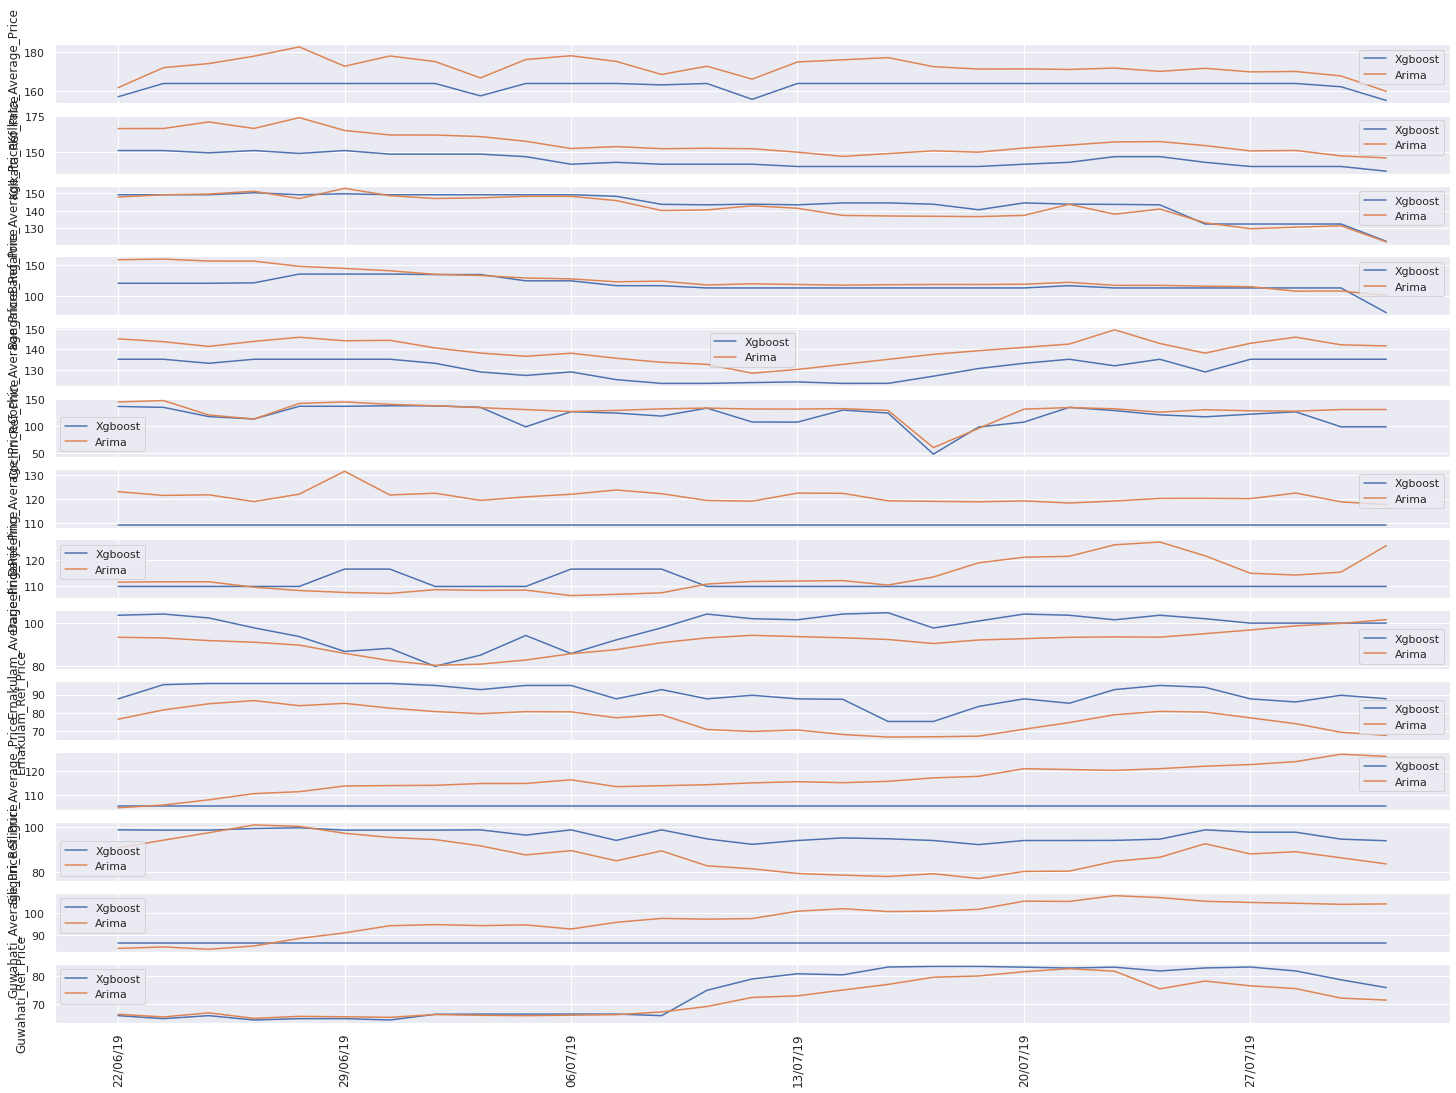

In [ ]:
def get_col_gen(d):
  for i in d:
    yield i


A = get_col_gen(test.columns[1:-1])
fig, ax = plt.subplots(14,1, figsize= (25,18), sharex = True)
for i in ax:
  j= next(A)
  sns.lineplot(np.arange(test.shape[0]), XGB_Forecast[j], label ='Xgboost' , ax =i)
  sns.lineplot(np.arange(test.shape[0]), forecasted_test[j], label ='Arima' , ax =i)
  #sns.lineplot(np.arange(test.shape[0]), test[j], label ='test' , ax =i)
  i.set_xticklabels(test['WeekEnding_Date'],rotation = 90,fontsize=12)  

In [ ]:
test

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,15/06/19,0.00,165.87,154.080,160.82,0.00,0.00,116.45,112.82,91.82,0.00,102.30,0,83.07,65.34,0.0
1,22/06/19,171.35,173.12,0.000,0.00,0.00,0.00,0.00,0.00,90.68,76.34,0.00,0,81.34,0.00,0.0
2,29/06/19,0.00,0.00,156.140,0.00,0.00,150.39,0.00,0.00,0.00,0.00,96.84,0,0.00,0.00,0.0
3,06/07/19,0.00,0.00,158.040,0.00,0.00,146.68,111.24,111.47,0.00,0.00,97.87,0,0.00,0.00,0.0
4,13/07/19,0.00,0.00,157.550,163.85,0.00,144.87,0.00,111.44,0.00,0.00,0.00,0,0.00,0.00,0.0
5,20/07/19,179.47,0.00,0.000,0.00,0.00,0.00,107.52,111.32,77.77,80.61,89.80,0,0.00,0.00,0.0
6,27/07/19,0.00,0.00,163.940,0.00,0.00,0.00,0.00,0.00,0.00,81.98,0.00,0,0.00,0.00,0.0
7,03/08/19,182.14,0.00,0.000,0.00,0.00,142.63,0.00,0.00,0.00,83.83,0.00,0,0.00,0.00,0.0
8,10/08/19,183.59,0.00,0.000,160.61,138.75,139.98,0.00,0.00,79.64,0.00,0.00,0,0.00,0.00,0.0
9,17/08/19,0.00,169.98,0.000,0.00,0.00,0.00,0.00,121.85,0.00,0.00,0.00,98.66,0.00,0.00,0.0


In [ ]:
train.iloc[1][train.columns[1:-1]].mean()

70.55

In [ ]:
train.iloc[1][train.columns[-1]]

70.55

In [ ]:
avg_cols = list(train.columns[1:-1])
avg_cols

['Kolkata_Average_Price',
 'Kolkata_Ref_Price',
 'Bangalore_Average_Price',
 'Bangalore_Ref_Price',
 'Cochin_Average_Price',
 'Cochin_Ref_Price',
 'Darjeeling_Average_Price',
 'Darjeeling_Ref_Price',
 'Ernakulam_Average_Price',
 'Ernakulam_Ref_Price',
 'Siliguri_Average_Price',
 'Siliguri_Ref_Price',
 'Guwahati_Average_Price',
 'Guwahati_Ref_Price']

In [ ]:
XGB_Forecast.drop(['Average_Price'], inplace=True, axis = 1)
XGB_Forecast['Average'] = XGB_Forecast[XGB_Forecast.columns[1:]].mean(axis=1)
XGB_Forecast

,0,Bangalore_Average_Price,Bangalore_Ref_Price,Kolkata_Average_Price,Kolkata_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,0,149.125641,120.320213,157.016342,151.232727,135.161209,135.559525,109.39827,109.726593,103.551979,87.634964,105.178261,98.696663,86.379662,66.005562,115.356270
1,1,149.125641,120.320213,163.860535,151.232727,135.161209,133.862701,109.39827,109.726593,104.116188,95.367325,105.178261,98.567719,86.379662,64.953613,116.232185
2,2,149.125641,120.320213,163.860535,149.661194,133.181244,116.895973,109.39827,109.726593,102.308617,96.011253,105.178261,98.567719,86.379662,66.005562,114.758629
3,3,150.288605,120.984673,163.860535,151.232727,135.161209,112.404182,109.39827,109.726593,97.691208,96.011253,105.178261,99.310654,86.379662,64.481415,114.436371
4,4,149.125641,135.070908,163.860535,149.234680,135.161209,135.883392,109.39827,109.726593,93.627373,96.011253,105.178261,99.629234,86.379662,64.953613,116.660034
5,5,149.684250,135.070908,163.860535,151.232727,135.161209,135.806824,109.39827,116.567871,86.692390,96.011253,105.178261,98.567719,86.379662,64.953613,116.754662
6,6,149.125641,135.070908,163.860535,148.742615,135.161209,136.830292,109.39827,116.567871,88.143417,96.011253,105.178261,98.567719,86.379662,64.481415,116.679932
7,7,149.125641,134.293564,163.860535,148.742615,133.181244,136.596222,109.39827,109.726593,79.751968,94.944534,105.178261,98.567719,86.379662,66.481415,115.444870
8,8,149.125641,134.293564,157.470398,148.742615,128.937958,133.932648,109.39827,109.726593,84.975456,92.677849,105.178261,98.696663,86.379662,66.548538,114.720299
9,9,149.125641,124.263603,163.860535,146.995300,127.210876,97.976166,109.39827,109.726593,94.127754,94.944534,105.178261,96.358246,86.379662,66.548538,112.292442


In [ ]:
forecasted_test['Average_price'] = forecasted_test[avg_cols].mean(axis = 1)
forecasted_test

,0,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average_price
0,0,161.700,166.510,147.78,158.080,145.20,143.79,123.070,111.41,93.28,76.57,104.270,90.67,84.06,66.490,119.491429
1,1,172.020,166.560,149.14,159.120,143.77,146.44,121.520,111.56,92.96,81.60,105.470,94.12,84.73,65.550,121.040000
2,2,174.130,171.120,149.53,155.970,141.48,119.83,121.780,111.57,91.74,84.97,107.710,97.40,83.67,66.980,119.848571
3,3,177.940,166.590,151.12,155.860,143.94,112.33,119.000,109.43,90.99,86.68,110.420,100.88,85.17,65.050,119.671429
4,4,182.740,174.130,146.93,147.500,145.97,141.11,122.050,108.11,89.64,83.92,111.240,100.25,88.56,65.760,121.993571
5,5,172.750,165.170,152.82,144.130,144.23,143.89,131.470,107.35,85.80,85.19,113.720,97.18,91.09,65.600,121.456429
6,6,178.050,162.060,148.58,140.370,144.46,139.38,121.710,106.97,82.42,82.59,113.900,95.35,94.33,65.410,119.684286
7,7,175.160,162.030,146.96,134.620,140.71,136.79,122.430,108.45,80.22,80.73,114.010,94.38,94.82,66.390,118.407143
8,8,166.740,160.940,147.32,132.860,138.20,133.32,119.490,108.17,80.77,79.56,114.790,91.59,94.37,66.130,116.732143
9,9,176.210,157.680,148.21,128.760,136.62,129.79,120.920,108.27,82.69,80.68,114.810,87.56,94.70,66.000,116.635714


In [ ]:
def create_submission(A, name = 'submission.csv'):
  A.to_csv(name, index=False)
create_submission(XGB_Forecast['Average'], name = 'submission2.csv')
